In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# 데이터 불러오기
respec_final = pd.read_csv('/Users/sungahwang/Desktop/BigContest_data/respec_final_XGB.csv')
respec_final

,Unnamed: 0,application_id,user_id,gender,insert_time,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,career,credit_grade
0,1,954900,553686,1.0,2022-06-07 14:29:03,30000000.0,개인사업자,정규직,기타가족소유,30000000.0,대환대출,0.0,1.0,1.0,27000000.0,50.0,16.0,3.0
1,2,137274,59516,1.0,2022-06-07 21:40:22,30000000.0,프리랜서,기타,기타가족소유,10000000.0,생활비,1.0,1.0,5.0,15000000.0,20.0,2.0,5.0
2,3,1570936,167320,1.0,2022-06-07 09:40:27,62000000.0,직장가입자(4대보험O),정규직,자가,2000000.0,생활비,1.0,1.0,7.0,344000000.0,30.0,6.0,4.0
3,4,967833,33400,1.0,2022-06-07 08:55:07,36000000.0,직장가입자(4대보험O),정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0,20.0,2.0,6.0
4,6,1614045,860410,1.0,2022-06-07 11:29:05,45000000.0,기타소득,기타,자가,15000000.0,대환대출,1.0,0.0,1.0,20000000.0,40.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968748,1394211,1864587,489900,1.0,2022-03-22 14:55:32,25000000.0,프리랜서,기타,기타가족소유,5000000.0,사업자금,0.0,0.0,0.0,0.0,20.0,2.0,7.0
968749,1394212,1327066,151422,1.0,2022-03-22 01:19:24,20000000.0,기타소득,기타,자가,50000000.0,생활비,0.0,1.0,1.0,43500000.0,60.0,6.0,1.0
968750,1394213,1319606,173524,1.0,2022-03-22 07:34:32,75000000.0,직장가입자(4대보험O),정규직,자가,100000000.0,대환대출,1.0,1.0,8.0,200000000.0,40.0,14.0,5.0
968751,1394214,1482466,766546,1.0,2022-03-22 22:12:35,50000000.0,직장가입자(4대보험O),정규직,자가,10000000.0,대환대출,0.0,1.0,10.0,117000000.0,40.0,6.0,6.0


In [3]:
respec_final = respec_final.drop(['Unnamed: 0'], axis = 1)

In [4]:
data = respec_final.drop(columns=['application_id','user_id','insert_time'])

In [5]:
from sklearn.preprocessing import PowerTransformer

In [6]:
for c in data.select_dtypes(exclude='object').columns:
    pt = PowerTransformer()
    data[c] =  pt.fit_transform(np.array(data[c]).reshape(-1, 1))

In [8]:
from kmodes.kprototypes import KPrototypes

In [11]:
cost = []
for cluster in range(1,7):
    print('{cluster}\.cluster start'.format(cluster=cluster))
    kproto = KPrototypes(n_clusters = cluster, init='Huang',n_init=2,verbose= 1)
    kproto.fit(data, categorical= [0,2,3,4,6,7,8])
    cost.append(kproto.cost_)

1\.cluster start
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 8094969.999999545
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 8094969.999999545
Best run was number 1
2\.cluster start
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 210581, ncost: 7268666.538281686
Run: 1, iteration: 2/100, moves: 153934, ncost: 7091444.4966895655
Run: 1, iteration: 3/100, moves: 71698, ncost: 7059260.246666497
Run: 1, iteration: 4/100, moves: 29385, ncost: 7053108.73542952
Run: 1, iteration: 5/100, moves: 22465, ncost: 7046566.43120176
Run: 1, iteration: 6/100, moves: 30726, ncost: 7033439.748646006
Run: 1, iteration: 7/100, moves: 54239, ncost: 6995634.882611494
Run: 1, iteration: 8/100, moves: 56163, ncost: 6960569.160463431
Run: 1, iteration: 9/100, moves: 56553, ncost: 6924075.034801

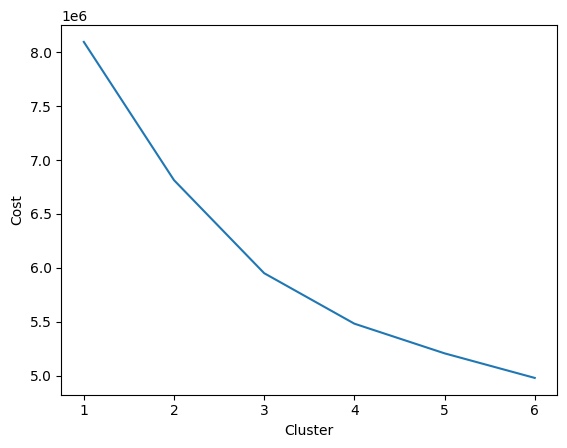

In [12]:
plt.plot(range(1,7),cost)
plt.xlabel('Cluster')
plt.ylabel('Cost')
plt.show()